
#LAB Logistic Regression
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement a Logistic Regression Classifier using Tensorflow.



## For Graphical Debugging:
You can use the [pycharm](https://www.jetbrains.com/pycharm/download/#section=linux) excellent graphical debugging based IDE.



###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack+\frac{\lambda}{2}\sum_{i=1}^k \theta_k^2$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}+\lambda*\theta_k$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

### Create some dummy data for testing

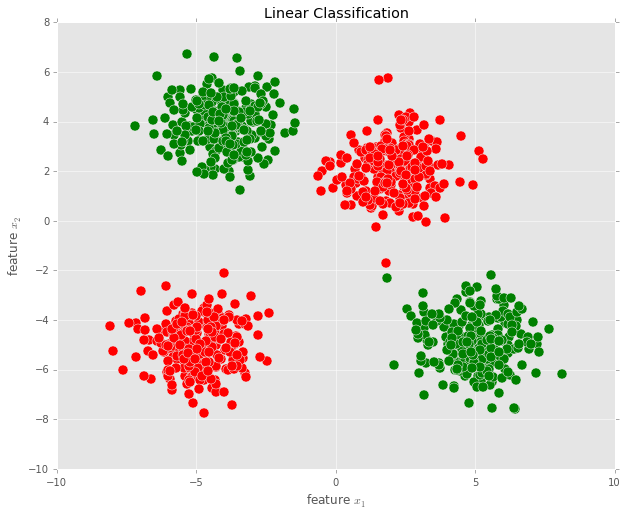

In [11]:
#Please carefully read the code to understand it...
np.random.seed(seed=99)

# make some data up
mean1 = np.array([-5,-5])
mean2 = np.array([2,2])
mean3 = np.array([5,-5])
mean4 = np.array([-4,4])

#Little Challenging...
# mean1 = np.array([-3,-3])
# mean2 = np.array([2,2])
# mean3 = np.array([3,-3])
# mean4 = np.array([-2,2])
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)

x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.ones((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='r', s=100)
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)
plt.scatter(x4[:,0],x4[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr.svg',format='svg')

In [12]:
mx=np.mean(X,axis=0)
stdx=np.std(X,axis=0)
X=(X-mx)/stdx

In [13]:
#Implement the SVM using TensorFlow...
import tensorflow as tf

In [14]:
sess=tf.InteractiveSession()

In [15]:
alpha=0.9 # learning rate
epochs=1000 # number of epochs..

In [16]:
nexamples=X.shape[0]

In [17]:
lembda=tf.constant(0.000)
spacing=np.spacing(1)

Xi=tf.placeholder(tf.float32,shape=[None,2])
Yi=tf.placeholder(tf.float32,shape=[None,1])

#Layer-1 weights....
W1=tf.Variable(tf.truncated_normal([3,2],stddev=0.001),name='Weights') # number of neurons time number of inputs
b1=tf.Variable(tf.truncated_normal([1,3]),name='Bias')

#Layer-2 weights...
W2=tf.Variable(tf.truncated_normal([1,3],stddev=0.001),name='Weights')
b2=tf.Variable(tf.random_normal([1]),name='Bias')

#Layer-1

a1=tf.matmul(Xi,tf.transpose(W1))+b1
print a1.get_shape()
nl1=tf.nn.sigmoid(a1)

#Layer-2
h=tf.matmul(nl1,tf.transpose(W2))+b2
#h=tf.nn.sigmoid(a2)+spacing
print h.get_shape()

#cost = tf.add(-tf.mul(Yi,tf.log(h)),-tf.mul(1-Yi,tf.log(1-h)))
cost = tf.square(h-Yi)

data_loss= tf.reduce_sum(cost)/nexamples

reg=tf.reduce_sum(tf.square(W1))+tf.reduce_sum(tf.square(W2))

loss=tf.add(data_loss, lembda * reg * 0.5)

step = tf.Variable(0, trainable=False)
rate = tf.train.exponential_decay(0.15, step, 1, 0.9999)
optimizer=tf.train.MomentumOptimizer(rate,0.95).minimize(loss)
#optimizer=tf.train.AdamOptimizer(alpha).minimize(loss)


init=tf.initialize_all_variables()

TensorShape([Dimension(None), Dimension(3)])
TensorShape([Dimension(None), Dimension(1)])


In [18]:
#with tf.Session() as sess:


sess.run(init)

for e in range (epochs):        
    #shuffle training data 
    [X,Y]=t.shuffle_data(X,Y)
    Xsplit=np.split(X,20)# batch size of 100
    Ysplit=np.split(Y,20) 

    for i in range(len(Xsplit)):
        sess.run(optimizer,feed_dict={Xi:Xsplit[i],Yi:Ysplit[i]})

    if e % 10 ==0:
        print ('After {} Epochs Loss Function Value is {}'.format(e, sess.run(loss,feed_dict={Xi:X,Yi:Y})))

theta=np.array(sess.run(W1))
bias=np.array(sess.run(b1))
res=np.array(sess.run(h,feed_dict={Xi:X}))
print theta, bias


After 0 Epochs Loss Function Value is 1.00052320957
After 10 Epochs Loss Function Value is 1.00090801716
After 20 Epochs Loss Function Value is 0.971103131771
After 30 Epochs Loss Function Value is 0.9393440485
After 40 Epochs Loss Function Value is 0.455573946238
After 50 Epochs Loss Function Value is 0.0363869406283
After 60 Epochs Loss Function Value is 0.0323915481567
After 70 Epochs Loss Function Value is 0.0312522798777
After 80 Epochs Loss Function Value is 0.0306126344949
After 90 Epochs Loss Function Value is 0.0300851669163
After 100 Epochs Loss Function Value is 0.0295999310911
After 110 Epochs Loss Function Value is 0.0291875619441
After 120 Epochs Loss Function Value is 0.0286627449095
After 130 Epochs Loss Function Value is 0.0282917134464
After 140 Epochs Loss Function Value is 0.0277957227081
After 150 Epochs Loss Function Value is 0.0273706167936
After 160 Epochs Loss Function Value is 0.0269827134907
After 170 Epochs Loss Function Value is 0.0265439841896
After 180 Ep

-1.77925453914 -1.78273724891 2.00256530058 2.00705094357
(1000, 2)


(-1.6320596271601668, 1.8546373948001498)

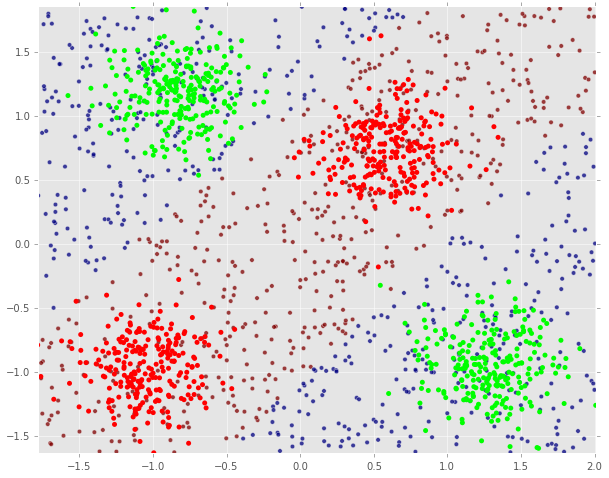

In [19]:
npts=1000
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.min(), X.min(), tx.max(), X.max()
#tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape

cs= np.array(sess.run(h,feed_dict={Xi:tx}))  > 0
#print cs.flatten(), np.unique(cs).flatten()

ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.75)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y),), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

In [20]:
Xt=sess.run(nl1,feed_dict={Xi:X})

In [21]:
print Xt.shape, Y.shape

(1000, 3) (1000, 1)


In [22]:
d=np.array(sess.run(b2)).flatten()# plane bias
normal=np.array(sess.run(W2)).flatten() # plane normal

In [23]:
print normal,d

[ 0.62070078 -1.98478496 -2.34468699] [ 0.92763907]


In [24]:
%matplotlib notebook

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(Xt[500:,0],Xt[500:,1],Xt[500:,2], c='r', s=100)
ax.scatter(Xt[:500,0],Xt[:500,1],Xt[500:,2], c='g', s=100)

# create x,y
xx, yy = np.meshgrid(np.arange(0,1,0.1), np.arange(0,1,0.1))

# # calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

#plot the plane...
#ax.plot_surface(xx,yy,z,rstride=1, cstride=1,
                    #facecolors=cm.jet(N),
#                    #linewidth=0, antialiased=False, shade=False
#                   alpha=0.7)

ax.set_xlabel('Neuron-1 Axis')
ax.set_ylabel('Neuron-2 Axis')
ax.set_zlabel('Neuron-3 Axis')


<IPython.core.display.Javascript object>

In [ ]:

plt.scatter(Xt[500:,0],Xt[500:,1], c='g', s=100)
plt.scatter(Xt[:500,0],Xt[:500,1], c='r', s=100)

plt.title("Mapping by 1st Hidden of Neural Network")
plt.xlabel("Mapped feature by Neuron 1")
plt.ylabel("Mapped feature by Neuron 2")

fig_ml_in_10 = plt.gcf()
plt.savefig('nn-transformation-layer-1.svg',format='svg')

In [ ]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==Ytest)
print "Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0])
t.print_confusion_matrix(pclasses.ravel(),Ytest.ravel())